## Exercise 1 

#### **Submission** <br>28.04. 12:00pm (via studIP) 
#### **Defense** <br> 08.05. 08:00-10:00, 08.05. 16:00-18:00 or 09.05. 10:00-12:00 

A **maximum** of 3 percentage points bonus for the exam can be achieved with each sheet if:
1) at least 60% of the worksheet has been completed correctly 
2) the worksheet has been successfully defended (explained to the tutors).

*Conditions*:
- Each group must register for a slot in studIP for the defense. Only ONE person registers a slot. The whole group must appear for defense.
- Successful defense means that a team member selected by us explains the solution and answers questions about it.
- ChatGPT and other tools may be used, but must be cited.
- The code must be explained without any aids.
- We will not only evaluate the correctness of the results, but also whether the code is efficient, easy to understand, tidy and well documented.
- Each group submits only one solution as a zip file, which is provided with the name and student number of a group member. For example, `mustermann_12345678.zip`. 


In this notebook, we will implement an approximation of the sine function step by step.  
To do this, we use the property that `sin(x)` can be represented by a sum: 

$$
sin(x) = \sum_0^\infty (-1)^n \frac{x^{2n+1}}{(2n+1)!}
$$

See [Wikipedia](https://de.wikipedia.org/wiki/Sinus_und_Kosinus)

Hint: Use the help function (e.g. `? sin`)

1) Write a function to calculate the factorial of a given number. **(20%)**

In [1]:
n=int(input("Enter the number :"))
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)


print("The factorial of", n,  "is", factorial(n))


The factorial of 9 is 362880


2) Write a function that calculates the sum described above up to a limit (given as a parameter of the function). **(15%)**

In [3]:
def approx_sin(x, limit):
    """
    Approximates sin(x) using the first 'limit' terms of its Taylor series.
    """
    sine_sum = 0
    for n in range(limit):
        numerator = (-1) ** n * (x ** (2 * n + 1))
        denominator = factorial(2 * n + 1)
        sine_sum += numerator / denominator
    return sine_sum

x=float(input("Enter the value of x : "))
limit=int(input("Enter the limit: ")) 
print("Approximate sin(1) with limit=5:", approx_sin(x,limit))


Approximate sin(1) with limit=5: 0.4794255386164159


3) Import the `sin` function from the `math` module of Python. Test them out. **(5%)**

In [ ]:
from math import sin
print(f"The appromiated value of sin funtion at angle {x}   and limit {limit} : {approx_sin(x, limit)}")

print(f"The actual value of sin function at angle {x} rad: , {sin(x)}")


The appromiated value of sin funtion at angle 0.5  and limit 5 : 0.4794255386164159
The actual value of sin function at angle 0.5: , 0.479425538604203


4) Compare the result with your function. How does the accuracy change when you increase the limit? **(10%)**

In [9]:
print("Limit \t Actual Value \t Approximation \t Error")
for lim in [1,3,5,7,10]:
    actual_value=sin(x)
    approximation=approx_sin(x, limit)
    difference= abs(actual_value -approximation)
    
    print(f"{lim}\t{actual_value:10f}\t {approximation:10f}\t {difference:10f}")

Limit 	 Actual Value 	 Approximation 	 Error
1	  0.479426	   0.479426	   0.000000
3	  0.479426	   0.479426	   0.000000
5	  0.479426	   0.479426	   0.000000
7	  0.479426	   0.479426	   0.000000
10	  0.479426	   0.479426	   0.000000


5) Generate a list `x` with `float` numbers in the range 0 to 10, spaced in increments of `0.01`. **(15%)**

In [11]:
import numpy as np
x_values= np.arange(0, 10.1, 0.01)

# print the first 5 number of list
print(x_values[:5])


[0.   0.01 0.02 0.03 0.04]


6) Run the function you wrote for each `x` and store the values ​​in a new list `y`. **(5%)**

In [12]:
limit = 10
y_values = [approx_sin(x, limit) for x in x_values]
print("First few y values:", y_values[:5])


First few y values: [np.float64(0.0), np.float64(0.009999833334166664), np.float64(0.01999866669333308), np.float64(0.029995500202495657), np.float64(0.03998933418663416)]


7) Plot the results using the `plot` function of `matplotlib.pyplot`. **(10%)**

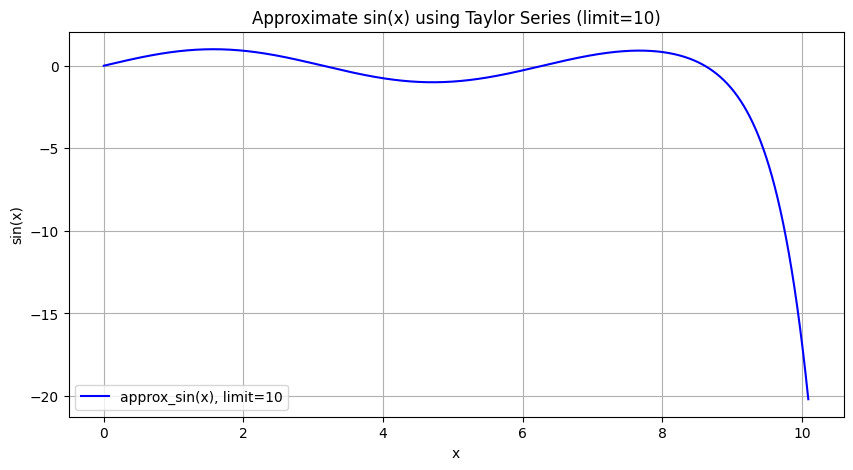

In [13]:
import matplotlib.pyplot as plt

# Plotting approximation for limit = 10
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='approx_sin(x), limit=10', color='blue')
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Approximate sin(x) using Taylor Series (limit=10)")
plt.legend()
plt.grid(True)
plt.show()


8) Plot the results for different limits. How do the results differ? Additionally, plot the `sin` function from the `math` module for the same x-values to compare the results. **(10%)**

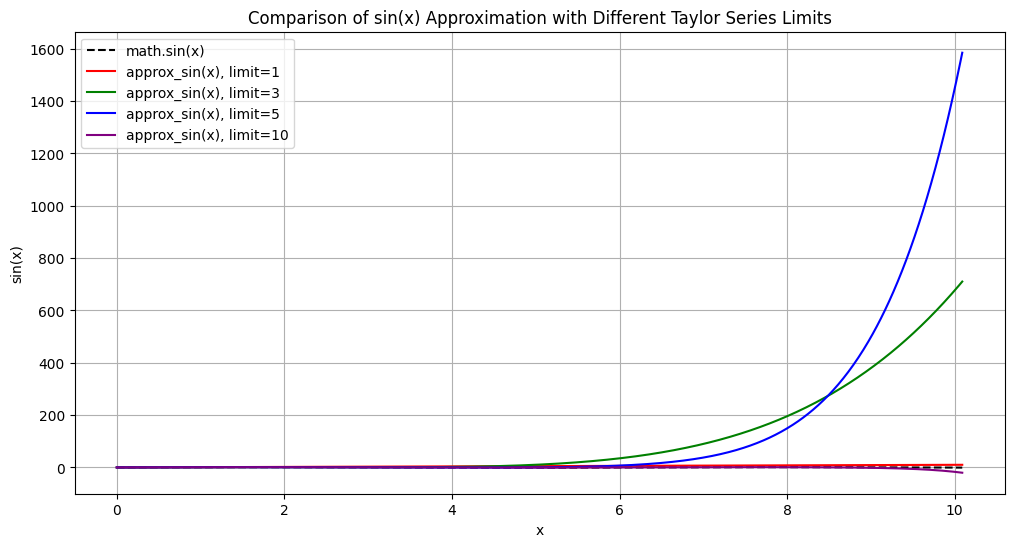

In [15]:
# Compute true sine values
true_sin_values = [sin(x) for x in x_values]

# Plot everything
plt.figure(figsize=(12, 6))

# Plot true sine
plt.plot(x_values, true_sin_values, label="math.sin(x)", color='black', linestyle='dashed')

# Plot approximations for different limits
limits = [1, 3, 5, 10]
colors = ['red', 'green', 'blue', 'purple']

for i, limit in enumerate(limits):
    y_approx = [approx_sin(x, limit) for x in x_values]
    plt.plot(x_values, y_approx, label=f'approx_sin(x), limit={limit}', color=colors[i])

# Formatting
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Comparison of sin(x) Approximation with Different Taylor Series Limits")
plt.legend()
plt.grid(True)
plt.show()


9) You can view two outputs in the same plot if you run the `plot` function in the same cell. Compare your sine function for two different limits. So that you can compare them better, plot the first function only in the range $x \in [0,5)$ and the second in the range $x \in [5,10)$. **(10%)**

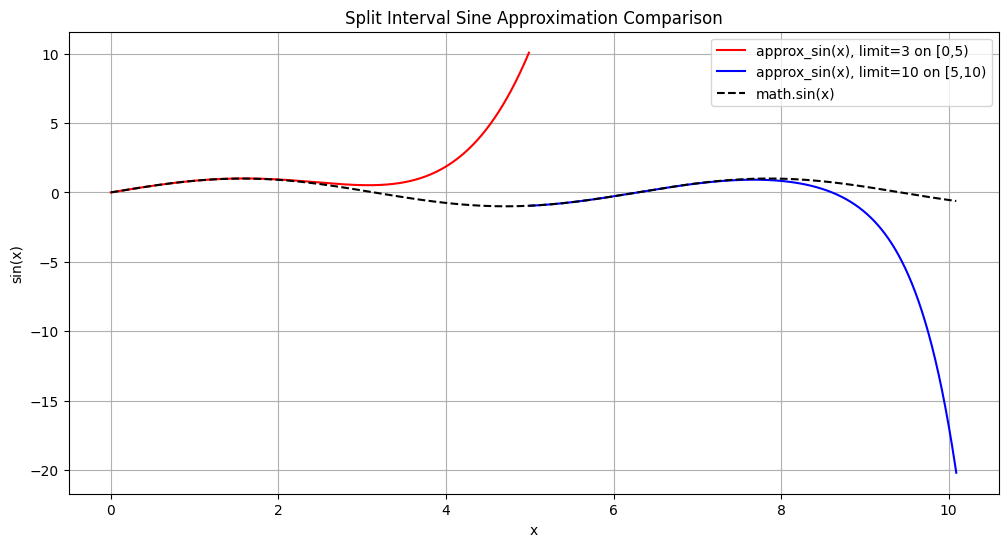

In [17]:
# Define x-values for each range
x_range1 = [x for x in x_values if x < 5]
x_range2 = [x for x in x_values if x >= 5]

# Compute y-values for different limits in different ranges
y_range1 = [approx_sin(x, 3) for x in x_range1]    # Less accurate
y_range2 = [approx_sin(x, 10) for x in x_range2]   # More accurate

# Compute true sine for both ranges (for reference)
y_true1 = [sin(x) for x in x_range1]
y_true2 = [sin(x) for x in x_range2]

# Plotting both on the same figure
plt.figure(figsize=(12, 6))

# Plot approximations
plt.plot(x_range1, y_range1, label="approx_sin(x), limit=3 on [0,5)", color='red')
plt.plot(x_range2, y_range2, label="approx_sin(x), limit=10 on [5,10)", color='blue')

# Plot the real sine for comparison
plt.plot(x_values, [sin(x) for x in x_values], label="math.sin(x)", linestyle='dashed', color='black')

# Formatting
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Split Interval Sine Approximation Comparison")
plt.legend()
plt.grid(True)
plt.show()
